# Initial Set Up

In [1]:
%matplotlib inline
import csv
import pandas as pd
import numpy as np

# Preliminary Visualisation and Processing

In [2]:
messages = [line.rstrip() for line in open('Data/raw_data.csv')]
print(len(messages))
for message_no, message in enumerate(messages[1:11]):
    print(message_no, message)

5729
0 "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : y

## Splitting the `text` into Subject & Content

In [3]:
source = open('Data/raw_data.csv', 'r')
reader = csv.reader(source)
next(reader)
i = 0
subjects = []
contents = []
labels = []

for line in reader:
    i += 1
    text = line[0]
    label = str(line[1])
    if label == '1':
        label = "spam"
    elif label == '0': 
        label = 'ham'
        
    try:
        subject = text[text.index("Subject") + len("Subject:")
                    : text.index("  ")].strip()
        content = text[text.index("  ") :].strip()
    except ValueError:
        subject = text[text.index("Subject") + len("Subject:")
                    :]
        content = ""
    subjects += [subject]
    contents += [content]
    labels.append(label)

df = pd.DataFrame({'subject': subjects,
                   'content': contents,
                   'label': labels})
df.to_csv('Data/Pre-processed.csv', index=False)

## Separating the Data into Training, Testing and Validation

In [4]:
def split_ttv(data, test_ratio, val_ratio):
    shuffled_indices = np.random\
                        .default_rng(seed=0)\
                        .permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    val_set_size = int(len(data) * val_ratio)
    test_indices = shuffled_indices[:test_set_size]
    val_indices = shuffled_indices[test_set_size:
        test_set_size + val_set_size]
    train_indices = shuffled_indices[test_set_size + val_set_size:]
    return (data.iloc[train_indices],
            data.iloc[test_indices],
            data.iloc[val_indices])

In [5]:
df = pd.read_csv('Data/Pre-processed.csv',
                 header=0)
train, test, validation = split_ttv(df, 0.2, 0.1)
train.to_csv('Data/train.csv', index=False)
test.to_csv('Data/test.csv', index=False)
validation.to_csv('Data/validation.csv', index=False)
print(f'Training Data: {len(train)} Items')
print(f'Testing Data: {len(test)} Items')
print(f'Validation Data: {len(validation)} Items')

Training Data: 4011 Items
Testing Data: 1145 Items
Validation Data: 572 Items


## Visualising the New Data

In [6]:
messages = pd.read_csv('Data/train.csv',
                       header=0)
messages = messages.dropna()

<Axes: ylabel='Frequency'>

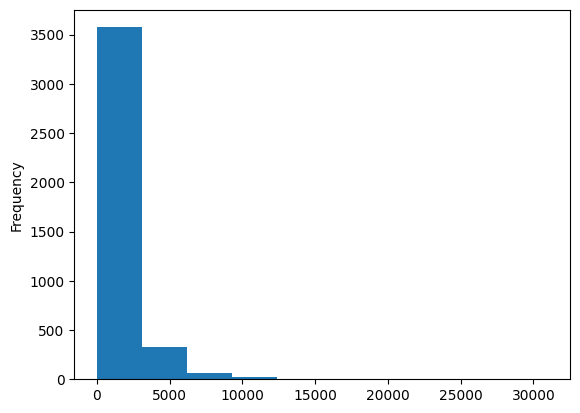

In [7]:
messages['content length'] = messages['content'].map(lambda text: len(str(text)))
messages['content length'].plot(bins=10, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

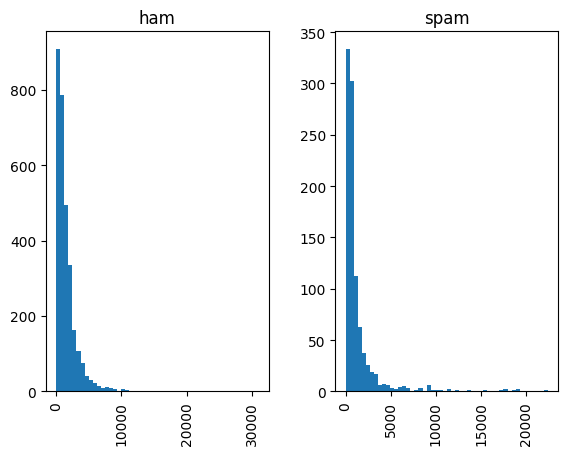

In [8]:
messages['content length'].describe()
messages.hist(column='content length', by='label', bins=50)

In [10]:
output = open('Assignment 2 - Data Tracking.txt', 'a')
output.write('Distribution in Files After Changing Seed:')
output.write('\n')
output.write('- [File Name] - [No. of 0\'s (Ham)] - [No. of 1\'s (Spam)]')
output.write('\n')
for file in ['train', 'test', 'validation']:
    reader = csv.reader(\
            open(f'Data/{file}.csv'))
    mapping = {'ham': 0,
               'spam': 1}
    distribution = [0, 0]
    next(reader)
    for line in reader:
        distribution[mapping[line[-1]]] += 1
    output.write(f'- {file}.csv - {distribution[0]} - {distribution[1]}')
    output.write('\n')